In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\fkari653'

In [3]:
print(os.listdir("datasets"))

['test', 'train', 'val']


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten   # Flatten --> Bridg
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from sklearn.metrics import classification_report, confusion_matrix

In [5]:
datasets_dir = os.listdir("datasets")

In [6]:
train_datasets = "datasets/train/"
test_datasets = "datasets/test/"
validation_datasets = "datasets/val/"

In [7]:
trainDatasets_normal = "datasets/train/NORMAL/"
train_datasets_Pne = "datasets/train/PNEUMONIA/"

In [8]:
print(len(os.listdir(train_datasets_Pne)))
print(len(os.listdir(trainDatasets_normal)))

3875
1342


In [9]:
random_value_normal = np.random.randint(0, len(os.listdir(trainDatasets_normal)))
random_value_pne = np.random.randint(0, len(os.listdir(train_datasets_Pne)))

Normal Image NORMAL2-IM-0435-0001.jpeg
Penumonia image Datasets Title person490_bacteria_2070.jpeg


Text(0.5, 1.0, 'Pneumonia')

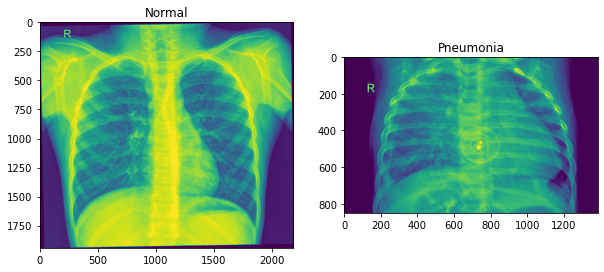

In [10]:
random_normal_pic = os.listdir(trainDatasets_normal)[random_value_normal] # index Location datasets[index]
normal_image_datasets = random_normal_pic
print("Normal Image",normal_image_datasets)

random_pne_pic = os.listdir(train_datasets_Pne)[random_value_pne]
pne_image_datasets = random_pne_pic

print("Penumonia image Datasets Title", random_pne_pic)

random_normal_pic_load = Image.open(trainDatasets_normal+normal_image_datasets)
random_pne_pic_load = Image.open(train_datasets_Pne+pne_image_datasets)

f  = plt.figure(figsize = (10, 8)) # frame Size
subplot = f.add_subplot(1, 2, 1)
img_load_plot = plt.imshow(random_normal_pic_load)
subplot.set_title("Normal")

subplot = f.add_subplot(1, 2, 2) # For showing Multiple image in one fram with columns and Row
img_load_plot = plt.imshow(random_pne_pic_load)
subplot.set_title("Pneumonia")

In [11]:
#datasets = Image.open("../datasets/train/NORMAL/IM-0115-0001.jpeg")
data = plt.imread("datasets/train/NORMAL/IM-0115-0001.jpeg")
data.shape

(1858, 2090)

In [12]:
model_for_Chest = Sequential() # empty Model

#1st Layer
model_for_Chest.add(Conv2D(32, (3, 3), activation = 'relu', input_shape  = (64, 64, 3))) # node --> door
model_for_Chest.add(MaxPooling2D(pool_size = (2, 2)))

#2nd Layer
model_for_Chest.add(Conv2D(64, (3, 3), activation = 'relu')) # node --> door
model_for_Chest.add(MaxPooling2D(pool_size = (2, 2)))

# Connected Layer or Bridg Layer

model_for_Chest.add(Flatten())
model_for_Chest.add(Dense(activation = "relu", units = 128))
model_for_Chest.add(Dense(activation = "sigmoid", units = 1))

In [13]:
model_for_Chest.compile(optimizer ="adam",
                       loss = "binary_crossentropy",
                       metrics = ["accuracy"])

In [14]:
number_test_sample = 600
batch_size = 32

In [15]:
train_datasets_generator = ImageDataGenerator(rescale= 1./255,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

test_datasets_generator = ImageDataGenerator(rescale=1./255) # Image Normalization

In [16]:
train_dataset_manage = train_datasets_generator.flow_from_directory("datasets/train/", 
                                                                   target_size=(64, 64),
                                                                   batch_size=32,
                                                                   class_mode= "binary")

test_dataset_manage = test_datasets_generator.flow_from_directory("datasets/test/", 
                                                                   target_size=(64, 64),
                                                                   batch_size=32,
                                                                   class_mode= "binary")

validation_dataset_mange = test_datasets_generator.flow_from_directory("datasets/val/",
                                                                    target_size=(64, 64),
                                                                   batch_size=32,
                                                                   class_mode= "binary")

Found 5217 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [17]:
model_for_Chest.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
model_for_Chest_info = model_for_Chest.fit_generator(train_dataset_manage,
                                                    steps_per_epoch=160,
                                                    epochs=10,
                                                    validation_data=validation_dataset_mange,
                                                    validation_steps=600)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
160/160 [==============================] - 148s 923ms/step - loss: 0.3349 - accuracy: 0.8571 - val_loss: 0.5165 - val_accuracy: 0.6875
Epoch 2/10
160/160 [==============================] - 159s 992ms/step - loss: 0.2175 - accuracy: 0.9078
Epoch 3/10
160/160 [==============================] - 159s 996ms/step - loss: 0.1905 - accuracy: 0.9247
Epoch 4/10
160/160 [==============================] - 162s 1s/step - loss: 0.1818 - accuracy: 0.9293
Epoch 5/10
160/160 [==============================] - 167s 1s/step - loss: 0.1672 - accuracy: 0.9361
Epoch 6/10
160/160 [==============================] - 170s 1s/step - loss: 0.1555 - accuracy: 0.9373
Epoch 7/10
160/160 [==============================] - 165s 1s/step - loss: 0.1444 - accuracy: 0.9469
Epoch 8/10
160/160 [==============================] - 162s 1s/step - loss: 0.1663 - accuracy: 0.9316
Epoch 9/10
160/160 [==============================] - 165s 1s/ste

In [23]:
test_accuracy = model_for_Chest.evaluate_generator(test_dataset_manage, steps = 600)
print("Accuracy: ", test_accuracy[1]*100, "%")

Accuracy:  88.94230723381042 %


In [24]:
y_predict = model_for_Chest.predict_generator(test_dataset_manage, 100)
y_predicts = np.argmax(y_predict, axis =1)

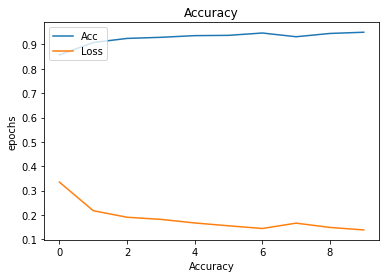

In [29]:
plt.plot(model_for_Chest_info.history['accuracy'])
plt.plot(model_for_Chest_info.history['loss'])
plt.title("Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("epochs")
plt.legend(["Acc", "Loss"], loc = "upper left")
plt.show()

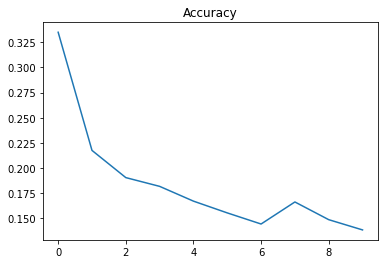

In [30]:
plt.plot(model_for_Chest_info.history['loss'])
plt.title("Accuracy")
plt.show()